
## Crime News Web-Scraping for Sentiment Analysis
#### Identifying news headlines related to 'crime' and 'New York' using NewsAPI
- Project uses the NewsAPI client to perform queries on 'crime' and 'New York' over a broad range of news sources.  
- The range of the query is approximately over the last 30 days. 
- The first query returned a lot of results fron non-tranditional news sites. The query was improved by selecting established news sources.
- Results were converted to a pandas dataframe, manipulated, then exported to a file 'news-scrape-22nov23.csv'.
- Further improvements can be made with a paid-for API subscription that will remove some of the limitations.

In [1]:
# Import required packages and NewsApiClient

from newsapi import NewsApiClient
import datetime as dt
import pandas as pd

In [2]:
# import sentiment analysis package 'TextBlob'
from textblob import TextBlob

# import plotting packages
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

### Importing api_key using environment variable
- Open Anaconda command prompt. Type following commands
- set API_KEY=*your_api_key*
- jupyter notebook

This ensures the api_key environment variable is available for the sessions

In [3]:
# import the API_KEY from the environment variable
import os

api_key = os.environ.get('API_KEY')

if api_key is None:
    raise ValueError("API key not found. Make sure you set the API_KEY environment variable.")



In [4]:
newsapi=NewsApiClient(api_key=api_key) # insert api_key here

### Notes on which kwargs to use in NewsAPI
- from_param = use 30 days ago. This can be modified. Developer subscription limits to 30 days in the past.
- to = set to today's date or customize as needed
- q = 'crime New York', to query headlines related to crime and New York
- language = 'en', for English
- page_size = 100, to capture the maximum number of results from the query

In [5]:
# set number of days to search in the past
past_days = 30

# generate today's date as a string and the start date as a string
current_datetime = dt.datetime.now() # datetime format

today_date = current_datetime.strftime('%Y-%m-%d')

start_date = (current_datetime - dt.timedelta(days = past_days)).strftime('%Y-%m-%d')

In [6]:
data = newsapi.get_everything(q='crime New York',
                                      from_param = start_date,
                                      to = today_date,
                                      language='en',
                                      page=1,
                                      page_size=100)

In [7]:
# the result is a dictionary, check the keys to find more details
data.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [8]:
data['status']

'ok'

In [9]:
data['totalResults'] # provides the number of results from the query

2860

In [10]:
# create a list of the articles for easier manipulation
articles = data['articles']

In [11]:
# print out the article names and the index to get a sense of the results
# note that the developer subscription limits the number of results to 100
for x, y in enumerate(articles):
    print(f'{x} {y["title"]}')

0 International mafia bust shows US-Italy crime links still strong
1 Is shoplifting getting worse? It depends on how you measure it.
2 Billionaire Ken Griffin says Miami could overtake New York as a financial hub
3 Andrew Cuomo accused of 'continuous sexual harassment' by former executive assistant in new court filing
4 Review: ‘Alan Wake II’ Is Far Darker Than Its Predecessor—and Perfects the Horror Genre
5 The top 10 most popular podcasts of 2023, according to Apple
6 Exonerated ‘Central Park Five’ Member Yusef Salaam Wins New York City Council Seat
7 I visited Target locations in New York City and the Midwest. The 2 stores felt like totally different chains.
8 Exonerated ‘Central Park Five’ Member Yusef Salaam Wins New York City Council Seat
9 WATCH: Dog 'high-fives' runners at New York City Marathon
10 The crowd jeers as Ivanka emerges
11 Rep. Jamie Raskin copyedited Rep. George Santos' error-laden thank you letter and sent it back to him
12 Crime blotter: iPhone and iPad seized fr

In [12]:
# examine the details of an article by going through the key value pairs
for key, value in articles[0].items():
    print(f'\n{key.ljust(15)} {value}')


source          {'id': 'bbc-news', 'name': 'BBC News'}

author          https://www.facebook.com/bbcnews

title           International mafia bust shows US-Italy crime links still strong

description     While decades of prosecutions weakened the US and Italian mafia, transatlantic relations remain strong.

url             https://www.bbc.co.uk/news/world-us-canada-67387249

urlToImage      https://ichef.bbci.co.uk/news/1024/branded_news/3AA2/production/_131701051_vicaro.png

publishedAt     2023-11-11T17:13:32Z

content         Their names could have been ripped from the kind of Hollywood mafia script that once dominated US cinema. 
But when an indictment dropped on Wednesday, Joseph "Joe Brooklyn" Lanni, Angelo "Fifi" Gra… [+8847 chars]


In [13]:
# create a pandas dataframe from the results
df = pd.DataFrame(articles)
df

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,International mafia bust shows US-Italy crime ...,While decades of prosecutions weakened the US ...,https://www.bbc.co.uk/news/world-us-canada-673...,https://ichef.bbci.co.uk/news/1024/branded_new...,2023-11-11T17:13:32Z,Their names could have been ripped from the ki...
1,"{'id': 'business-insider', 'name': 'Business I...",Dominick Reuter,Is shoplifting getting worse? It depends on ho...,Shoplifting rates are down in most major metro...,https://www.businessinsider.com/shoplifting-ge...,https://i.insider.com/654bd74f3cc84b4dfafecfa1...,2023-11-10T10:12:01Z,"Some of the more than $200,000 in stolen retai..."
2,"{'id': 'business-insider', 'name': 'Business I...",Tom Carter,Billionaire Ken Griffin says Miami could overt...,"Ken Griffin, founder of hedge fund Citadel, is...",https://www.businessinsider.com/billionaire-ke...,https://i.insider.com/6554a3c636d588dc55d09199...,2023-11-15T11:42:43Z,Citadel founder Ken Griffin and former Amazon ...
3,"{'id': 'business-insider', 'name': 'Business I...",Michelle Mark,Andrew Cuomo accused of 'continuous sexual har...,"Andrew Cuomo's former executive assistant, Bri...",https://www.businessinsider.com/andrew-cuomo-s...,https://i.insider.com/656133519c7d23cb3b9f8895...,2023-11-25T01:12:24Z,Former New York Gov. Andrew CuomoAlbin Lohr-Jo...
4,"{'id': 'wired', 'name': 'Wired'}",Reid McCarter,Review: ‘Alan Wake II’ Is Far Darker Than Its ...,"With its latest game, Remedy Entertainment nai...",https://www.wired.com/review/alan-wake-ii-review/,,2023-11-04T13:00:00Z,Alan Wake II begins with a man stumbling naked...
...,...,...,...,...,...,...,...,...
95,"{'id': None, 'name': 'The Indian Express'}",Lifestyle Desk,"International Emmy Awards: Shefali Shah, Vir D...","From Shefali Shah to Jim Sarbh, check out what...",https://indianexpress.com/article/lifestyle/fa...,https://images.indianexpress.com/2023/11/emmys...,2023-11-21T07:00:20Z,The 51st International Emmy Awards in New York...
96,"{'id': 'al-jazeera-english', 'name': 'Al Jazee...",Al Jazeera,Yusef Salaam elected unopposed to a central Ha...,Wrongly convicted as a teenager over a 1989 ra...,https://www.aljazeera.com/news/2023/11/8/yusef...,https://www.aljazeera.com/wp-content/uploads/2...,2023-11-08T04:17:16Z,"Yusef Salaam, who gained international attenti..."
97,"{'id': None, 'name': 'Variety'}",Clayton Davis,New York Film Critics Awards Predictions: Coul...,Oscar season begins this week in the Big Apple...,https://variety.com/2023/film/awards/new-york-...,https://variety.com/wp-content/uploads/2023/11...,2023-11-29T20:40:00Z,Oscar season begins this week in the Big Apple...
98,"{'id': None, 'name': 'Forbes'}","Marc Berman, Senior Contributor, \n Marc Berma...",‘Blue Bloods’ To Conclude On CBS With Season 14,"Blue Bloods, the veteran Tom Selleck crime dra...",https://www.forbes.com/sites/marcberman1/2023/...,https://imageio.forbes.com/specials-images/ima...,2023-11-21T14:09:08Z,NEW YORK - BLUE BLOODS has been a Friday night...


## Results Analysis
- The results from NewsAPI uses a broad range of sources, many of which are non-traditional news sites. 
- Need to examine more closely the sources to improve the web-scraping operation.
- Based on the analysis, we can limit the query to desired news sources.

In [14]:
# Examine the news sources and count from each source.
print(df['source'].value_counts())

source
{'id': 'business-insider', 'name': 'Business Insider'}        15
{'id': 'abc-news', 'name': 'ABC News'}                        10
{'id': None, 'name': 'NPR'}                                    7
{'id': 'time', 'name': 'Time'}                                 7
{'id': 'bbc-news', 'name': 'BBC News'}                         6
{'id': 'politico', 'name': 'Politico'}                         5
{'id': None, 'name': 'Boing Boing'}                            4
{'id': 'al-jazeera-english', 'name': 'Al Jazeera English'}     4
{'id': None, 'name': 'Stereogum'}                              3
{'id': None, 'name': 'Deadline'}                               3
{'id': None, 'name': '/FILM'}                                  3
{'id': None, 'name': 'HuffPost'}                               2
{'id': None, 'name': 'AppleInsider'}                           2
{'id': None, 'name': 'Slate Magazine'}                         2
{'id': None, 'name': 'The Indian Express'}                     2
{'id': None, 'name

### Plan to use the 'sources' kwarg to limit the query to traditional news sites
'bbc-news, abc-news, business-insider, time, politico, al-jazeera-english, the-atlantic, huffpost, npr'

In [15]:
# Perform improved query with sources specified
data2 = newsapi.get_everything(q='crime New York',
                                sources='bbc-news, abc-news, business-insider, time, politico, al-jazeera-english,\
                                the-atlantic, huffpost, npr',
                                from_param = start_date,
                                to = today_date,
                                language='en',
                                page=1,
                                page_size=100)

In [16]:
# create a list for easier manipluation
articles2 = data2['articles']
data2['totalResults'] # check the number of results

152

In [17]:
# Print out the article names and the index to view the results
for x, y in enumerate(articles2):
    print(f'{x} {y["title"]}')

0 International mafia bust shows US-Italy crime links still strong
1 Is shoplifting getting worse? It depends on how you measure it.
2 Billionaire Ken Griffin says Miami could overtake New York as a financial hub
3 Andrew Cuomo accused of 'continuous sexual harassment' by former executive assistant in new court filing
4 The top 10 most popular podcasts of 2023, according to Apple
5 Exonerated ‘Central Park Five’ Member Yusef Salaam Wins New York City Council Seat
6 I visited Target locations in New York City and the Midwest. The 2 stores felt like totally different chains.
7 WATCH: Dog 'high-fives' runners at New York City Marathon
8 Rep. Jamie Raskin copyedited Rep. George Santos' error-laden thank you letter and sent it back to him
9 Street crime units face challenges following high-profile controversies
10 Prosecutors charge 16 alleged Gambino mafia members in US and Italy
11 Former Obama official charged with harassment, stalking of halal cart vendor
12 New York City police issue w

## Second Set of Results Analysis
- The second list of headlines is better matched to the topic of 'crime and New York' with the improved API query.
- The NewsAPI Developer Subscription limitation of 100 results and 1 month of data means that these 100 results will be used for the Sentiment Analysis.
- Further improvements could be made with a 'paid-for' API subscription.  

#### Next steps are to create a dataframe, perform some transformations, and export to a csv file.


In [18]:
# create a dataframe from the results
df2 = pd.DataFrame(articles2)

# create a column with datetime format for the published date
df2['pub_date'] = df2['publishedAt'].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ").date())

# create a column that extracts the source name
df2['source_name'] = df2['source'].apply(lambda x: x['name'])
df2  # output the result for verification

,source,author,title,description,url,urlToImage,publishedAt,content,pub_date,source_name
0,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,International mafia bust shows US-Italy crime ...,While decades of prosecutions weakened the US ...,https://www.bbc.co.uk/news/world-us-canada-673...,https://ichef.bbci.co.uk/news/1024/branded_new...,2023-11-11T17:13:32Z,Their names could have been ripped from the ki...,2023-11-11,BBC News
1,"{'id': 'business-insider', 'name': 'Business I...",Dominick Reuter,Is shoplifting getting worse? It depends on ho...,Shoplifting rates are down in most major metro...,https://www.businessinsider.com/shoplifting-ge...,https://i.insider.com/654bd74f3cc84b4dfafecfa1...,2023-11-10T10:12:01Z,"Some of the more than $200,000 in stolen retai...",2023-11-10,Business Insider
2,"{'id': 'business-insider', 'name': 'Business I...",Tom Carter,Billionaire Ken Griffin says Miami could overt...,"Ken Griffin, founder of hedge fund Citadel, is...",https://www.businessinsider.com/billionaire-ke...,https://i.insider.com/6554a3c636d588dc55d09199...,2023-11-15T11:42:43Z,Citadel founder Ken Griffin and former Amazon ...,2023-11-15,Business Insider
3,"{'id': 'business-insider', 'name': 'Business I...",Michelle Mark,Andrew Cuomo accused of 'continuous sexual har...,"Andrew Cuomo's former executive assistant, Bri...",https://www.businessinsider.com/andrew-cuomo-s...,https://i.insider.com/656133519c7d23cb3b9f8895...,2023-11-25T01:12:24Z,Former New York Gov. Andrew CuomoAlbin Lohr-Jo...,2023-11-25,Business Insider
4,"{'id': 'business-insider', 'name': 'Business I...",Haley Tenore,"The top 10 most popular podcasts of 2023, acco...",Apple released a list of the top 10 most popul...,https://www.businessinsider.com/most-popular-p...,https://i.insider.com/65662e5bfd6200867dd03f52...,2023-11-29T18:53:48Z,Choosing a new podcast to start can be a daunt...,2023-11-29,Business Insider
...,...,...,...,...,...,...,...,...,...,...
95,"{'id': 'abc-news', 'name': 'ABC News'}",LARRY NEUMEISTER Associated Press,Jury begins deliberating fate of FTX founder S...,A New York jury has begun deliberating whether...,https://abcnews.go.com/Business/wireStory/jury...,https://i.abcnewsfe.com/a/f1404021-7928-492d-9...,2023-11-02T19:34:25Z,NEW YORK -- A New York jury began deliberating...,2023-11-02,ABC News
96,"{'id': 'time', 'name': 'Time'}",Margie Ratliff,My Family’s Story Is Proof That Documentaries ...,"Margie Ratliff, who was featured in the Netfli...",https://time.com/6330932/ethical-standards-doc...,https://api.time.com/wp-content/uploads/2023/1...,2023-11-03T14:54:18Z,"Subject is now playing in New York, Los Angele...",2023-11-03,Time
97,"{'id': 'abc-news', 'name': 'ABC News'}",JIM POLLOCK Associated Press,"Music Review: Violent Femmes debut, a cult fav...",To celebrate 40 years since the release of the...,https://abcnews.go.com/Entertainment/wireStory...,https://i.abcnewsfe.com/a/e127bffe-2f5c-4208-9...,2023-11-30T17:18:34Z,"In 1983, Milwaukee trio Violent Femmes release...",2023-11-30,ABC News
98,"{'id': 'abc-news', 'name': 'ABC News'}",COLLEEN LONG Associated Press,"The Lewiston, Maine, mass shooting was the fir...",The deputy director of the new gun violence pr...,https://abcnews.go.com/US/wireStory/lewiston-m...,https://i.abcnewsfe.com/a/489ce988-10a3-4ed6-8...,2023-11-08T21:42:30Z,WASHINGTON -- The first thing Greg Jackson did...,2023-11-08,ABC News


In [19]:
# export to csv the headline, description and published date
export_data = df2[['pub_date','title', 'description', 'source_name']]

# Generate the file name with today's date
file_name = f'news-scrape-{today_date}.csv'

# Save DataFrame to CSV with the dynamically generated file name
export_data.to_csv(file_name, index=False)

export_data # output the result for verification

,pub_date,title,description,source_name
0,2023-11-11,International mafia bust shows US-Italy crime ...,While decades of prosecutions weakened the US ...,BBC News
1,2023-11-10,Is shoplifting getting worse? It depends on ho...,Shoplifting rates are down in most major metro...,Business Insider
2,2023-11-15,Billionaire Ken Griffin says Miami could overt...,"Ken Griffin, founder of hedge fund Citadel, is...",Business Insider
3,2023-11-25,Andrew Cuomo accused of 'continuous sexual har...,"Andrew Cuomo's former executive assistant, Bri...",Business Insider
4,2023-11-29,"The top 10 most popular podcasts of 2023, acco...",Apple released a list of the top 10 most popul...,Business Insider
...,...,...,...,...
95,2023-11-02,Jury begins deliberating fate of FTX founder S...,A New York jury has begun deliberating whether...,ABC News
96,2023-11-03,My Family’s Story Is Proof That Documentaries ...,"Margie Ratliff, who was featured in the Netfli...",Time
97,2023-11-30,"Music Review: Violent Femmes debut, a cult fav...",To celebrate 40 years since the release of the...,ABC News
98,2023-11-08,"The Lewiston, Maine, mass shooting was the fir...",The deputy director of the new gun violence pr...,ABC News


## Project to Perform Sentiment Analysis on Crime News
- Project uses the results from the 'crime news' API query.
- Keyword function selects headlines from the imported file.
- Sentiment Analysis is performed by the open source TextBlob library.
- A scatterplot chart displays the sentiment score over time.

In [20]:
# import and the read the file into a dataframe

# Generate the file name with today's date
file_name = f'news-scrape-{today_date}.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_name)

In [21]:
# function to identify headlines that contain a keyword.
def find_headline_by_keyword(keyword, dataframe):

    # create an empty list
    matching_headlines = []

    # for loop to check each headline and description for the keyword
    for index, row in df.iterrows():
        headline = row['title']
        description = row['description']
        pub_date = row['pub_date']
        
        # if statement to check for keyword
        if keyword.lower() in headline.lower() or keyword.lower() in description.lower():
            matching_headlines.append({'headline': headline, 'pub_date': pub_date})
    
    # capture results into a dataframe for easier manipulation
    df_match = pd.DataFrame(matching_headlines)
    
    return df_match

## Performing Keywords Search
- Keywords that returned multiple results for sentiment analysis are: 'crime', 'violent', 'court', 'gun', 'hate', and 'new york'. Others could be tested.
- To increase the number of results, the keyword search as applied to both the headline and article description parameters.
- A larger dataset would be needed to identify meaningful trends or make any inferences.

In [22]:
# Example keyword searches using 'violent', 'gun' and 'crime'
df_crime = find_headline_by_keyword('crime', df)
df_gun = find_headline_by_keyword('gun', df)
df_violent = find_headline_by_keyword('violent', df)

df_violent # view results for one of the searches

,headline,pub_date
0,Is shoplifting getting worse? It depends on ho...,2023-11-10
1,Muslim students at University of Connecticut r...,2023-11-09
2,"If Santos is expelled, it'll be more punishmen...",2023-11-30
3,"Music Review: Violent Femmes debut, a cult fav...",2023-11-30


In [23]:
# Function to get sentiment scores
def get_sentiment_score(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the function to the 'headline' column and create a 'sentiment_score' column for each df of our keyword searches
df_gun['sentiment_score'] = df_gun['headline'].apply(get_sentiment_score)
df_crime['sentiment_score'] = df_crime['headline'].apply(get_sentiment_score)
df_violent['sentiment_score'] = df_violent['headline'].apply(get_sentiment_score)

# Sort the values by date
df_gun = df_gun.sort_values(by='pub_date')
df_crime = df_crime.sort_values(by='pub_date')
df_violent = df_violent.sort_values(by='pub_date')

# Display the DataFrame with sentiment scores for the example keyword = 'violent'
df_violent[['pub_date', 'headline', 'sentiment_score']]

,pub_date,headline,sentiment_score
1,2023-11-09,Muslim students at University of Connecticut r...,0.000000
0,2023-11-10,Is shoplifting getting worse? It depends on ho...,-0.400000
2,2023-11-30,"If Santos is expelled, it'll be more punishmen...",0.300000
3,2023-11-30,"Music Review: Violent Femmes debut, a cult fav...",-0.054545


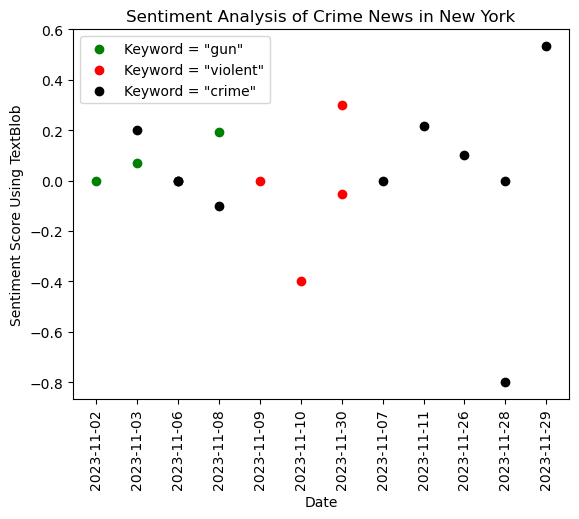

In [24]:
# Plot the results
plt.scatter(df_gun['pub_date'], df_gun['sentiment_score'], color='g', label='Keyword = "gun"')
plt.scatter(df_violent['pub_date'], df_violent['sentiment_score'], color='r', label='Keyword = "violent"')
plt.scatter(df_crime['pub_date'], df_crime['sentiment_score'], color='black', label='Keyword = "crime"')

# Add legend
plt.legend()

plt.title('Sentiment Analysis of Crime News in New York')
plt.ylabel('Sentiment Score Using TextBlob')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

## Results and Analysis
Headlines were selected using a few keywords and the results were given a sentiment score.  The sentiment score was plotted vs time.  The score fluctuates around zero for the results obtained without showing any significant trends or leaning towards a positive or negative sentiment. The dataset is too small to detect meaningful trends or make any inferences regarding the sentiment score.  

### Further Work
Further work and improvements can be made with: 
- Using a larger dataset to provide more results for identifying any trends.
- Creating a more sophisticated keyword function using regular expressions.
- Modifying the code to streamline the keyword function and results display for more complicated keyword searches.
- Testing different NLP algorithms for sentiment scoring and making comparisons with other reference cases.